# DBSCAN Practice

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import cluster
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Fit DBSCAN on a generated dataset


We will start with a simple generated dataset. 

Import the `make_circles` function from `sklearn.datasets`. You can use this to generate some clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

### 1. Plot the generated circles data

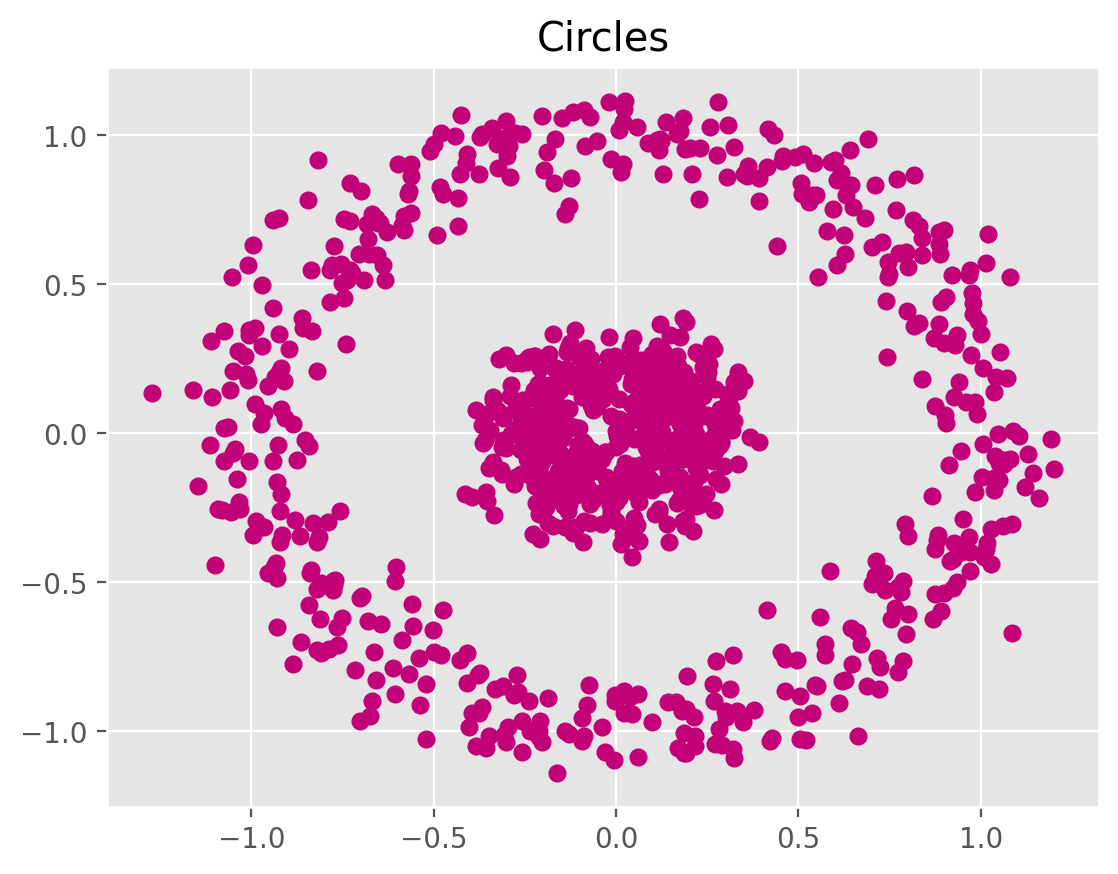

In [2]:
from sklearn.datasets import make_circles

circles_X, circles_y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)
plt.scatter(circles_X[:, 0], circles_X[:, 1], c='#C20078')
plt.title('Circles')
plt.show()

### 2. Rescale the data

In [3]:
ss = StandardScaler()
X = ss.fit_transform(circles_X)

### 3. Fit DBSCAN on the rescaled data

In [4]:
db = DBSCAN().fit(X)

### 4. Extract the cluster labels.

In [5]:
labels = db.labels_
print(np.unique(labels))

[0 1]


### 5. How many clusters do you get?

In [6]:
n_clusters = len(np.unique(labels))
print(n_clusters)

2


### 6. Evaluate DBSCAN

- Visually
- With silhouette score
- Using the true `y`, with homogeneity, completeness and V-measure score

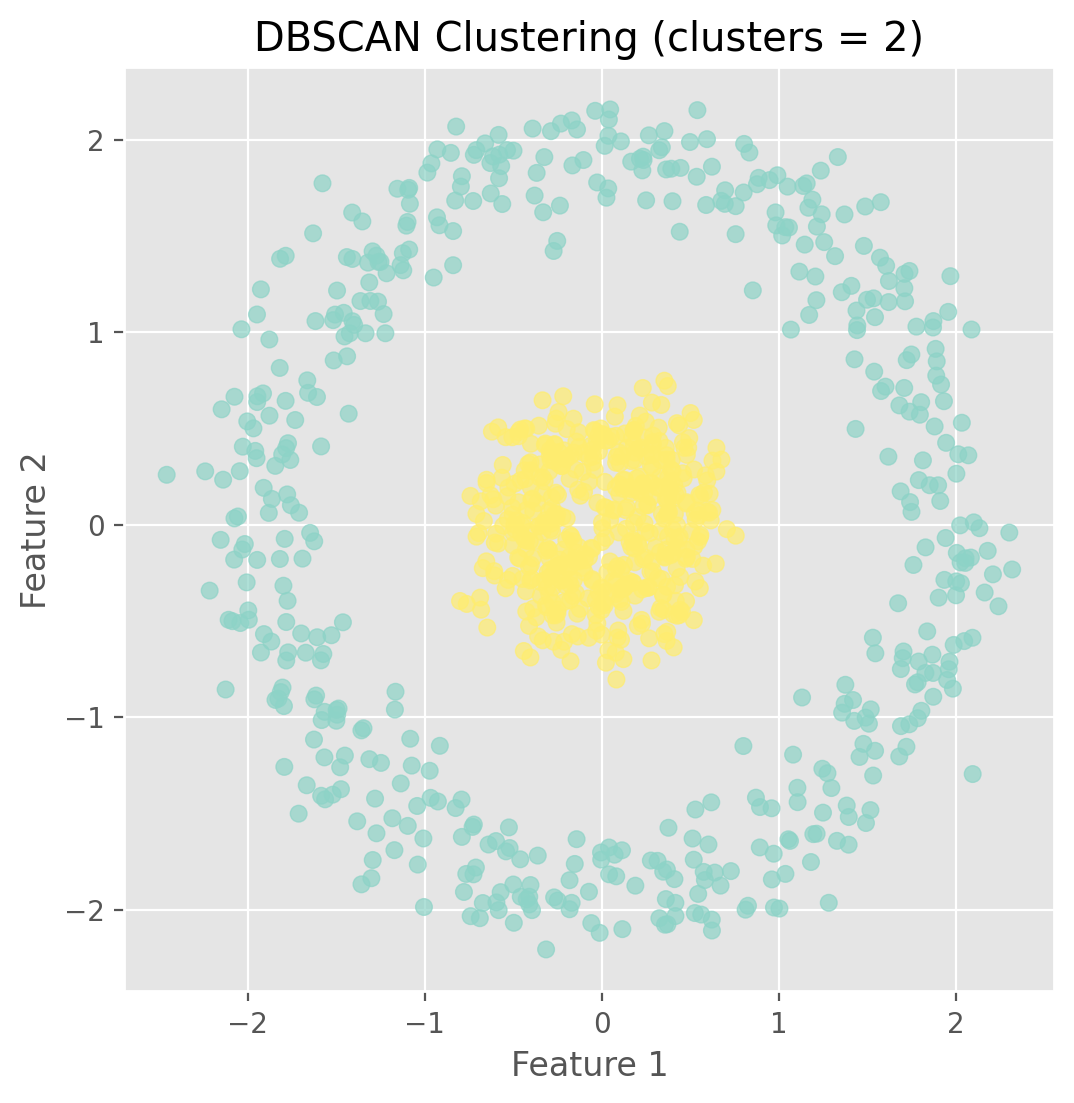

In [7]:
# Plot DBSCAN clustering
plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'Set3', alpha = 0.7)
plt.title('DBSCAN Clustering (clusters = 2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
# Evaluate silhouette score
print('Silhouette Score: ', metrics.silhouette_score(X, labels))

Silhouette Score:  0.23783520183694895


In [10]:
# Evaluate clustering performance
homogeneity, completeness, v_measure = metrics.homogeneity_completeness_v_measure(circles_y, labels)

print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-measure Score:", v_measure)

Homogeneity Score: 1.0
Completeness Score: 1.0
V-measure Score: 1.0


The scores indicate that the DBSCAN performance in relevance to the true y labels have perfect homogeneity, completeness and v-measure, meaning perfect clustering performance in terms of capturing the underlying structure of the data.

However, the lower silhouette coefficient indicates that the clusters may not be separated well and data points within each cluster not as cohesive.

Despite this on visual inspection, the clustering results do show that the they have been appropriately clustered.

### 7.  Extract the core samples. 

How many do you have?

In [48]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_count = np.sum(core_samples_mask)

print("Number of core samples:", core_samples_count)

Number of core samples: 1000


### 8. Create a scatter plot of the data with coloring according to the cluster labels

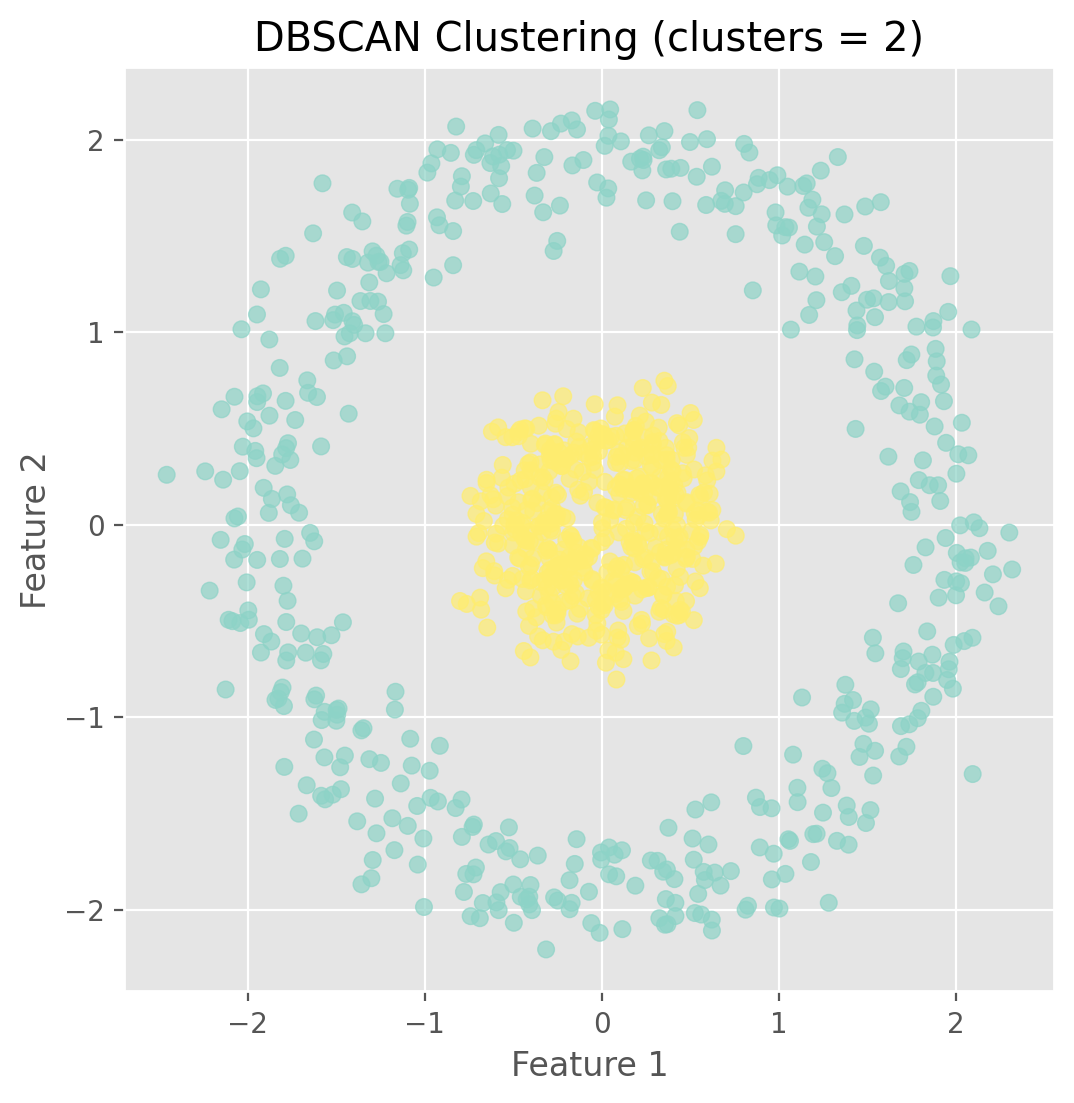

In [96]:
# Already plotted above but will repeat again for clarity
# Plot DBSCAN clustering
plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'Set3', alpha = 0.7)
plt.title('DBSCAN Clustering (clusters = 2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Bonus:

### Try k-means and hierarchical clustering. Which differences do you observe? Which algorithm do you find most suitable in each case? 

In [65]:
from sklearn.cluster import KMeans, AgglomerativeClustering

#### KMeans

In [97]:
# Initiate KMeans model and fit
km = KMeans(n_clusters = 2).fit(X)

C:\Users\Mazza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


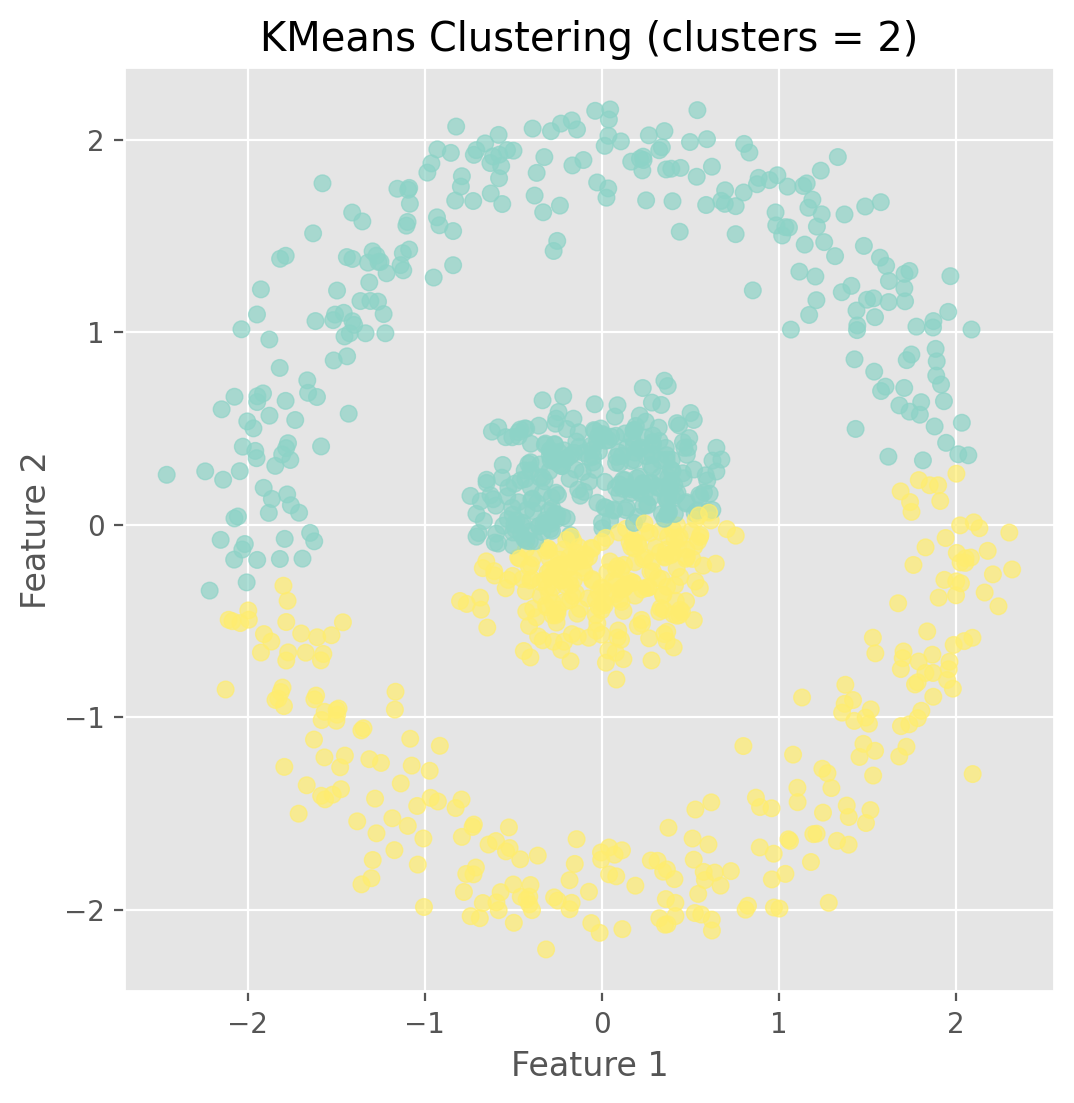

Silhouette Score:  0.25803068603470386


In [98]:
km_labels = km.labels_

# Plot KMeans
plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], c = km_labels, cmap = 'Set3', alpha = 0.7)
plt.title('KMeans Clustering (clusters = 2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate silhouette score
print('Silhouette Score: ', metrics.silhouette_score(X, km_labels))

While the silhouette score is slightly higher than DBSCAN, on visual inspection do not seem as clearly clustered.

In [99]:
distortions = []
K = range(1, 15)
for k in K:
    km_opt = KMeans(n_clusters = k).fit(X)
    distortions.append(km_opt.inertia_)

C:\Users\Mazza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Mazza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Mazza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Mazza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

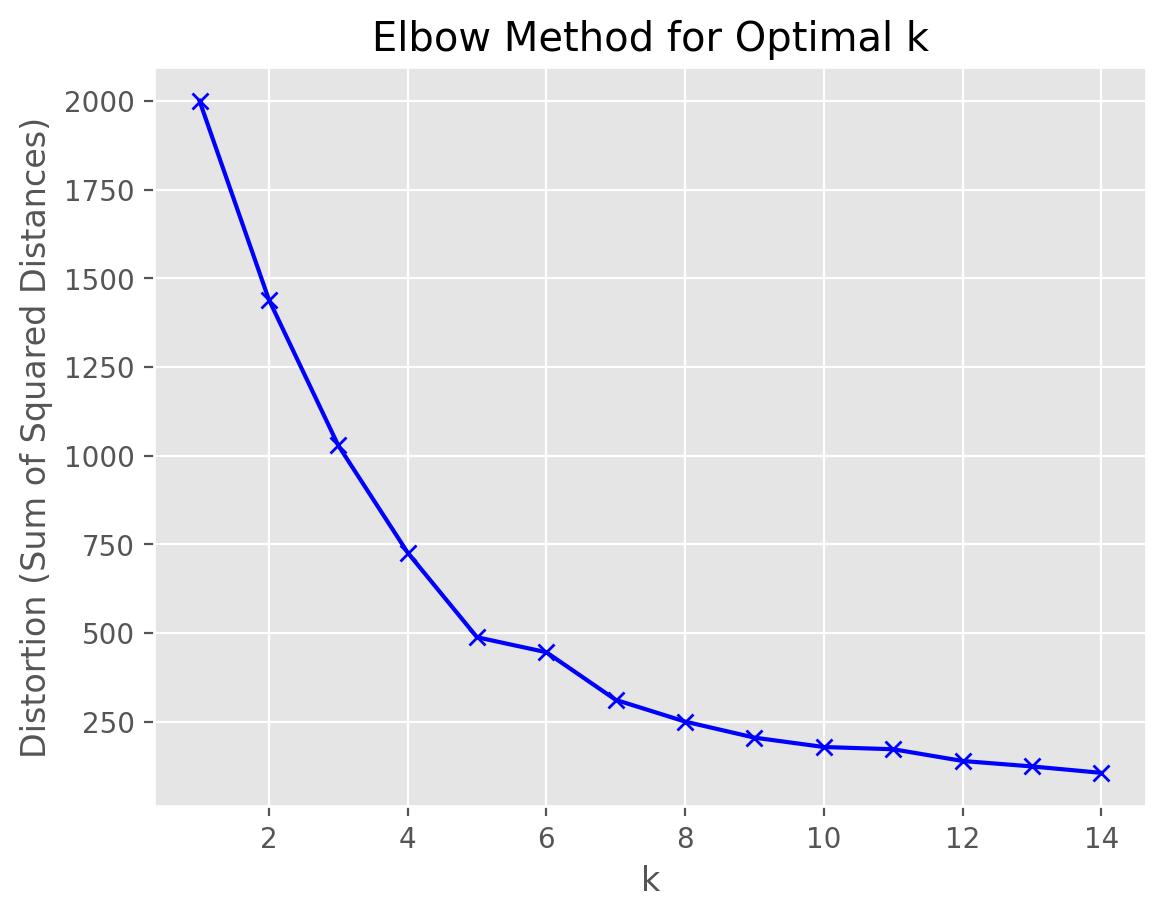

In [100]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [102]:
# Initiate KMeans model and fit for optimal k
km_opt = KMeans(n_clusters = 7).fit(X)

C:\Users\Mazza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


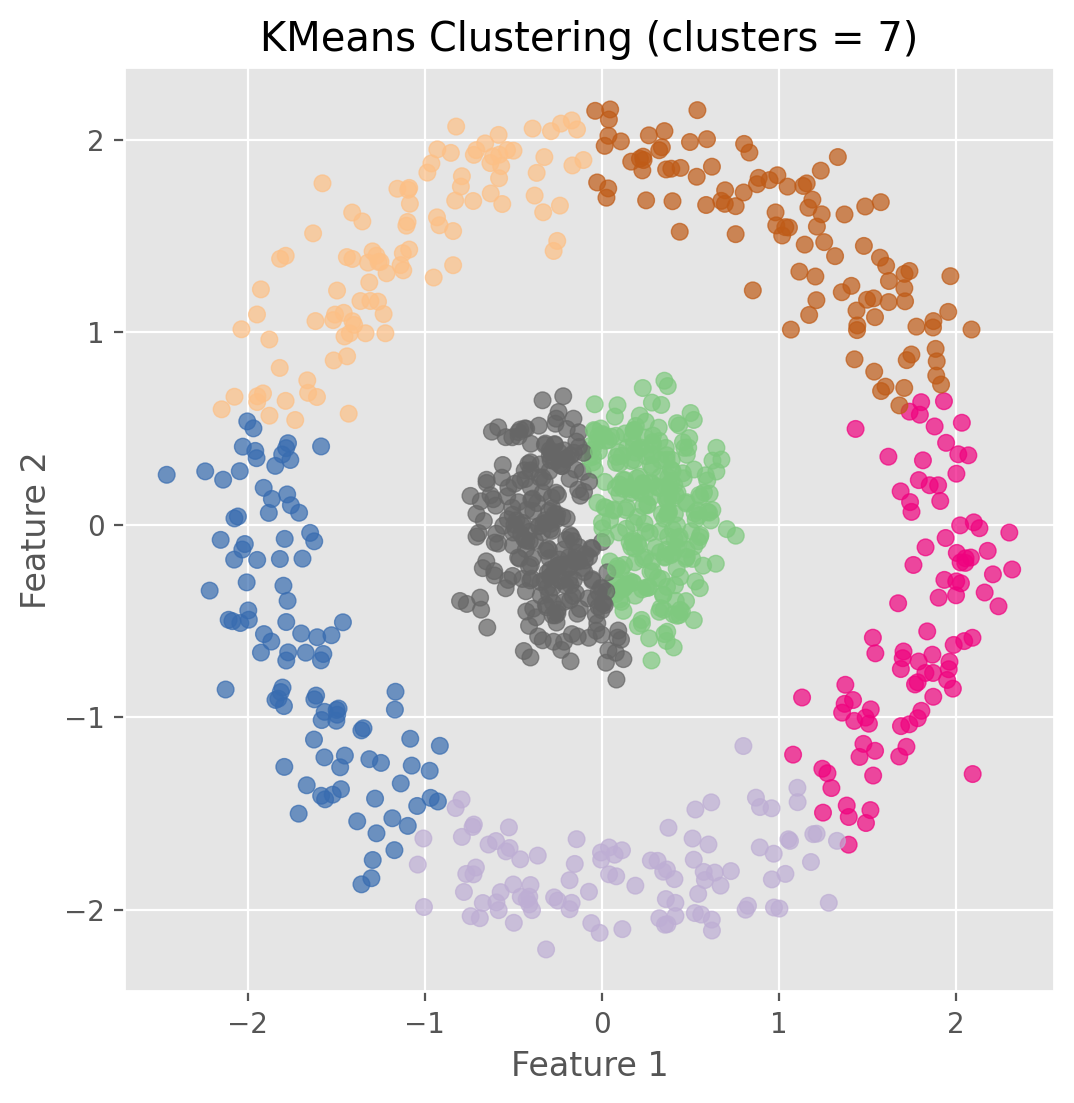

Silhouette Score:  0.41354874740159087


In [105]:
km_labels_opt = km_opt.labels_

# Plot KMeans
plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], c = km_labels_opt, cmap = 'Accent', alpha = 0.7)
plt.title('KMeans Clustering (clusters = 7)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate silhouette score
print('Silhouette Score: ', metrics.silhouette_score(X, km_labels_opt))

When using the elbow method to determine the optimal k for the KMeans method, which is 7 clusters, the silhouette score is improved by a lot. However, visually is this the best way to cluster?

#### Hierarchical Clustering

In [106]:
# Initiate KMeans model and fit
hc = AgglomerativeClustering(n_clusters = 2).fit(X)

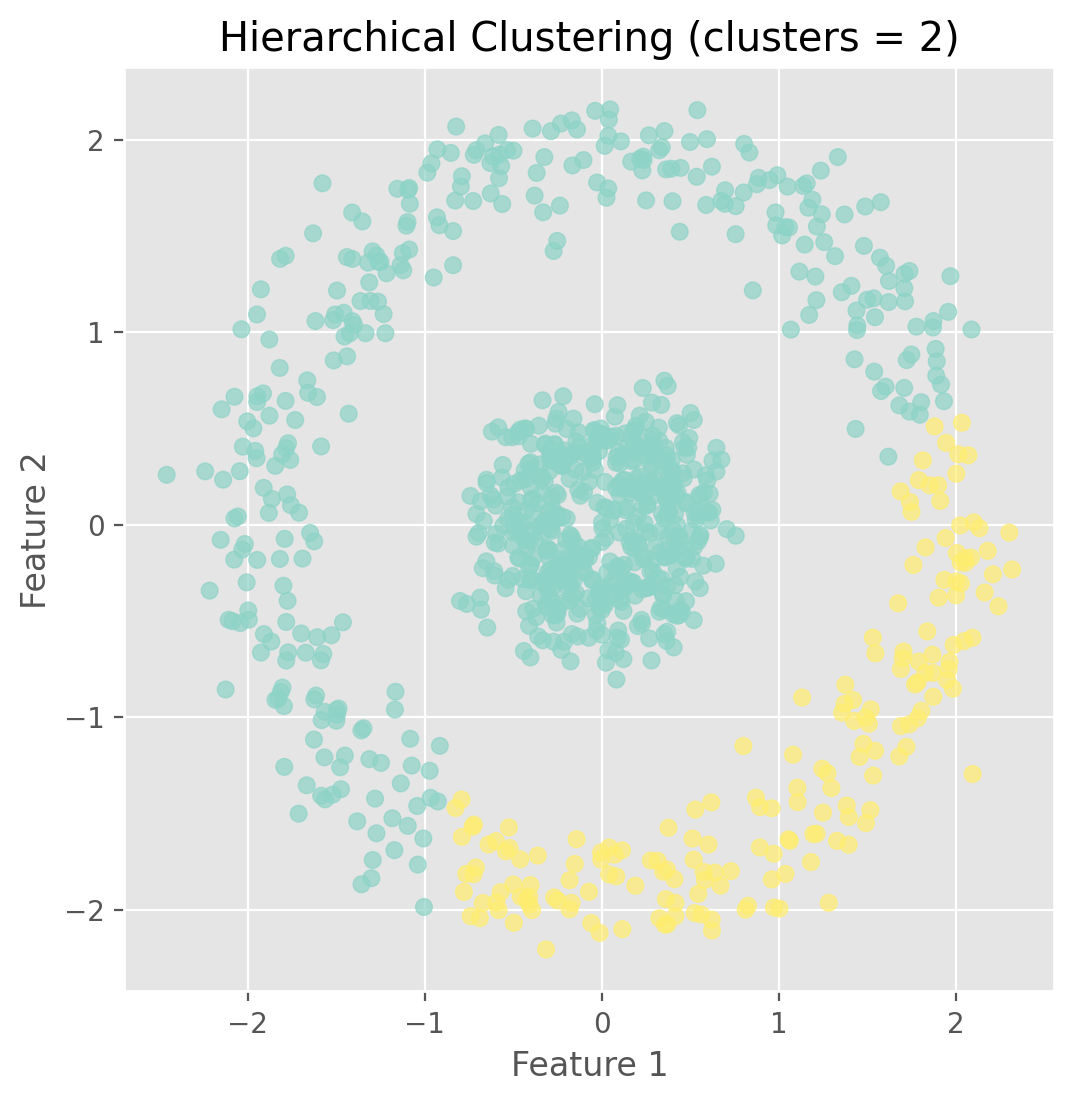

Silhouette Score:  0.38079306435662624


In [107]:
hc_labels = hc.labels_

# Plot KMeans
plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], c = hc_labels, cmap = 'Set3', alpha = 0.7)
plt.title('Hierarchical Clustering (clusters = 2)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate silhouette score
print('Silhouette Score: ', metrics.silhouette_score(X, hc_labels))

The silhouette score for hierarchical clustering is higher than both DBSCAN and KMeans when using clusters = 2, however as with the others when visually inspecting the clusters it does not seem as appropriately clustered.